# Online News Popularity

## Data Mining

In [208]:
import numpy as np
import pandas as pd
%matplotlib notebook
import scipy.stats
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor

'''
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
'''

# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
missing_values = ["n/a", "na", "--","-"]

def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',', na_values = missing_values)
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('OnlineNewsPopularity.csv')
data = dataset.values

x = data[:, :60]
y = data[:, 60]

print("Dimensionalitat de la BBDD:", dataset.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

Dimensionalitat de la BBDD: (39644, 61)
Dimensionalitat de les entrades X (39644, 60)
Dimensionalitat de l'atribut Y (39644,)


In [209]:
print("Per comptar el nombre de valors no existents:")
print(dataset.isnull().sum())
print("#############################################")
print(dataset.isnull().values.any())

Per comptar el nombre de valors no existents:
url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64
#############################################
False


In [183]:
print("Per visualitzar les primeres 5 mostres de la BBDD:")
dataset.head() 

Per visualitzar les primeres 5 mostres de la BBDD:


url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...     731.000   
1  http://mashable.com/2013/01/07/ap-samsung-spon...     731.000   
2  http://mashable.com/2013/01/07/apple-40-billio...     731.000   
3  http://mashable.com/2013/01/07/astronaut-notre...     731.000   
4   http://mashable.com/2013/01/07/att-u-verse-apps/     731.000   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0           12.000            219.000             0.664              1.000   
1            9.000            255.000             0.605              1.000   
2            9.000            211.000             0.575              1.000   
3            9.000            531.000             0.504              1.000   
4           13.000           1072.000             0.416              1.000   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0                      0.815       4.000            2.000      1.000  ...   
1                      0.792       3.000            1.000      1.000  ...   
2                      0.664       3.000            1.000      1.000  ...   
3                      0.666       9.000            0.000      1.000  ...   
4                      0.541      19.000           19.000     20.000  ...   

    min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
0                   0.100                   0.700                  -0.350   
1                   0.033                   0.700                  -0.119   
2                   0.100                   1.000                  -0.467   
3                   0.136                   0.800                  -0.370   
4                   0.033                   1.000                  -0.220   

    min_negative_polarity   max_negative_polarity   title_subjectivity  \
0                  -0.600                  -0.200                0.500   
1                  -0.125                  -0.100                0.000   
2                  -0.800                  -0.133                0.000   
3                  -0.600                  -0.167                0.000   
4                  -0.500                  -0.050                0.455   

    title_sentiment_polarity   abs_title_subjectivity  \
0                     -0.188                    0.000   
1                      0.000                    0.500   
2                      0.000                    0.500   
3                      0.000                    0.500   
4                      0.136                    0.045   

    abs_title_sentiment_polarity   shares  
0                          0.188      593  
1                          0.000      711  
2                          0.000     1500  
3                          0.000     1200  
4                          0.136      505  

[5 rows x 61 columns]

In [184]:
print("Per veure estadístiques dels atributs numèrics de la BBDD:")
dataset.describe()

Per veure estadístiques dels atributs numèrics de la BBDD:


timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
count   39644.000        39644.000          39644.000         39644.000   
mean      354.530           10.399            546.515             0.548   
std       214.164            2.114            471.108             3.521   
min         8.000            2.000              0.000             0.000   
25%       164.000            9.000            246.000             0.471   
50%       339.000           10.000            409.000             0.539   
75%       542.000           12.000            716.000             0.609   
max       731.000           23.000           8474.000           701.000   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
count          39644.000                  39644.000   39644.000   
mean               0.996                      0.689      10.884   
std                5.231                      3.265      11.332   
min                0.000                      0.000       0.000   
25%                1.000                      0.626       4.000   
50%                1.000                      0.690       8.000   
75%                1.000                      0.755      14.000   
max             1042.000                    650.000     304.000   

        num_self_hrefs   num_imgs   num_videos  ...   min_positive_polarity  \
count        39644.000  39644.000    39644.000  ...               39644.000   
mean             3.294      4.544        1.250  ...                   0.095   
std              3.855      8.309        4.108  ...                   0.071   
min              0.000      0.000        0.000  ...                   0.000   
25%              1.000      1.000        0.000  ...                   0.050   
50%              3.000      1.000        0.000  ...                   0.100   
75%              4.000      4.000        1.000  ...                   0.100   
max            116.000    128.000       91.000  ...                   1.000   

        max_positive_polarity   avg_negative_polarity   min_negative_polarity  \
count               39644.000               39644.000               39644.000   
mean                    0.757                  -0.260                  -0.522   
std                     0.248                   0.128                   0.290   
min                     0.000                  -1.000                  -1.000   
25%                     0.600                  -0.328                  -0.700   
50%                     0.800                  -0.253                  -0.500   
75%                     1.000                  -0.187                  -0.300   
max                     1.000                   0.000                   0.000   

        max_negative_polarity   title_subjectivity   title_sentiment_polarity  \
count               39644.000            39644.000                  39644.000   
mean                   -0.108                0.282                      0.071   
std                     0.095                0.324                      0.265   
min                    -1.000                0.000                     -1.000   
25%                    -0.125                0.000                      0.000   
50%                    -0.100                0.150                      0.000   
75%                    -0.050                0.500                      0.150   
max                     0.000                1.000                      1.000   

        abs_title_subjectivity   abs_title_sentiment_polarity     shares  
count                39644.000                      39644.000  39644.000  
mean                     0.342                          0.156   3395.380  
std                      0.189                          0.226  11626.951  
min                      0.000                          0.000      1.000  
25%                      0.167                          0.000    946.000  
50%                      0.500                          0.000   1400.000  
75%                      0.500 

<IPython.core.display.Javascript object>


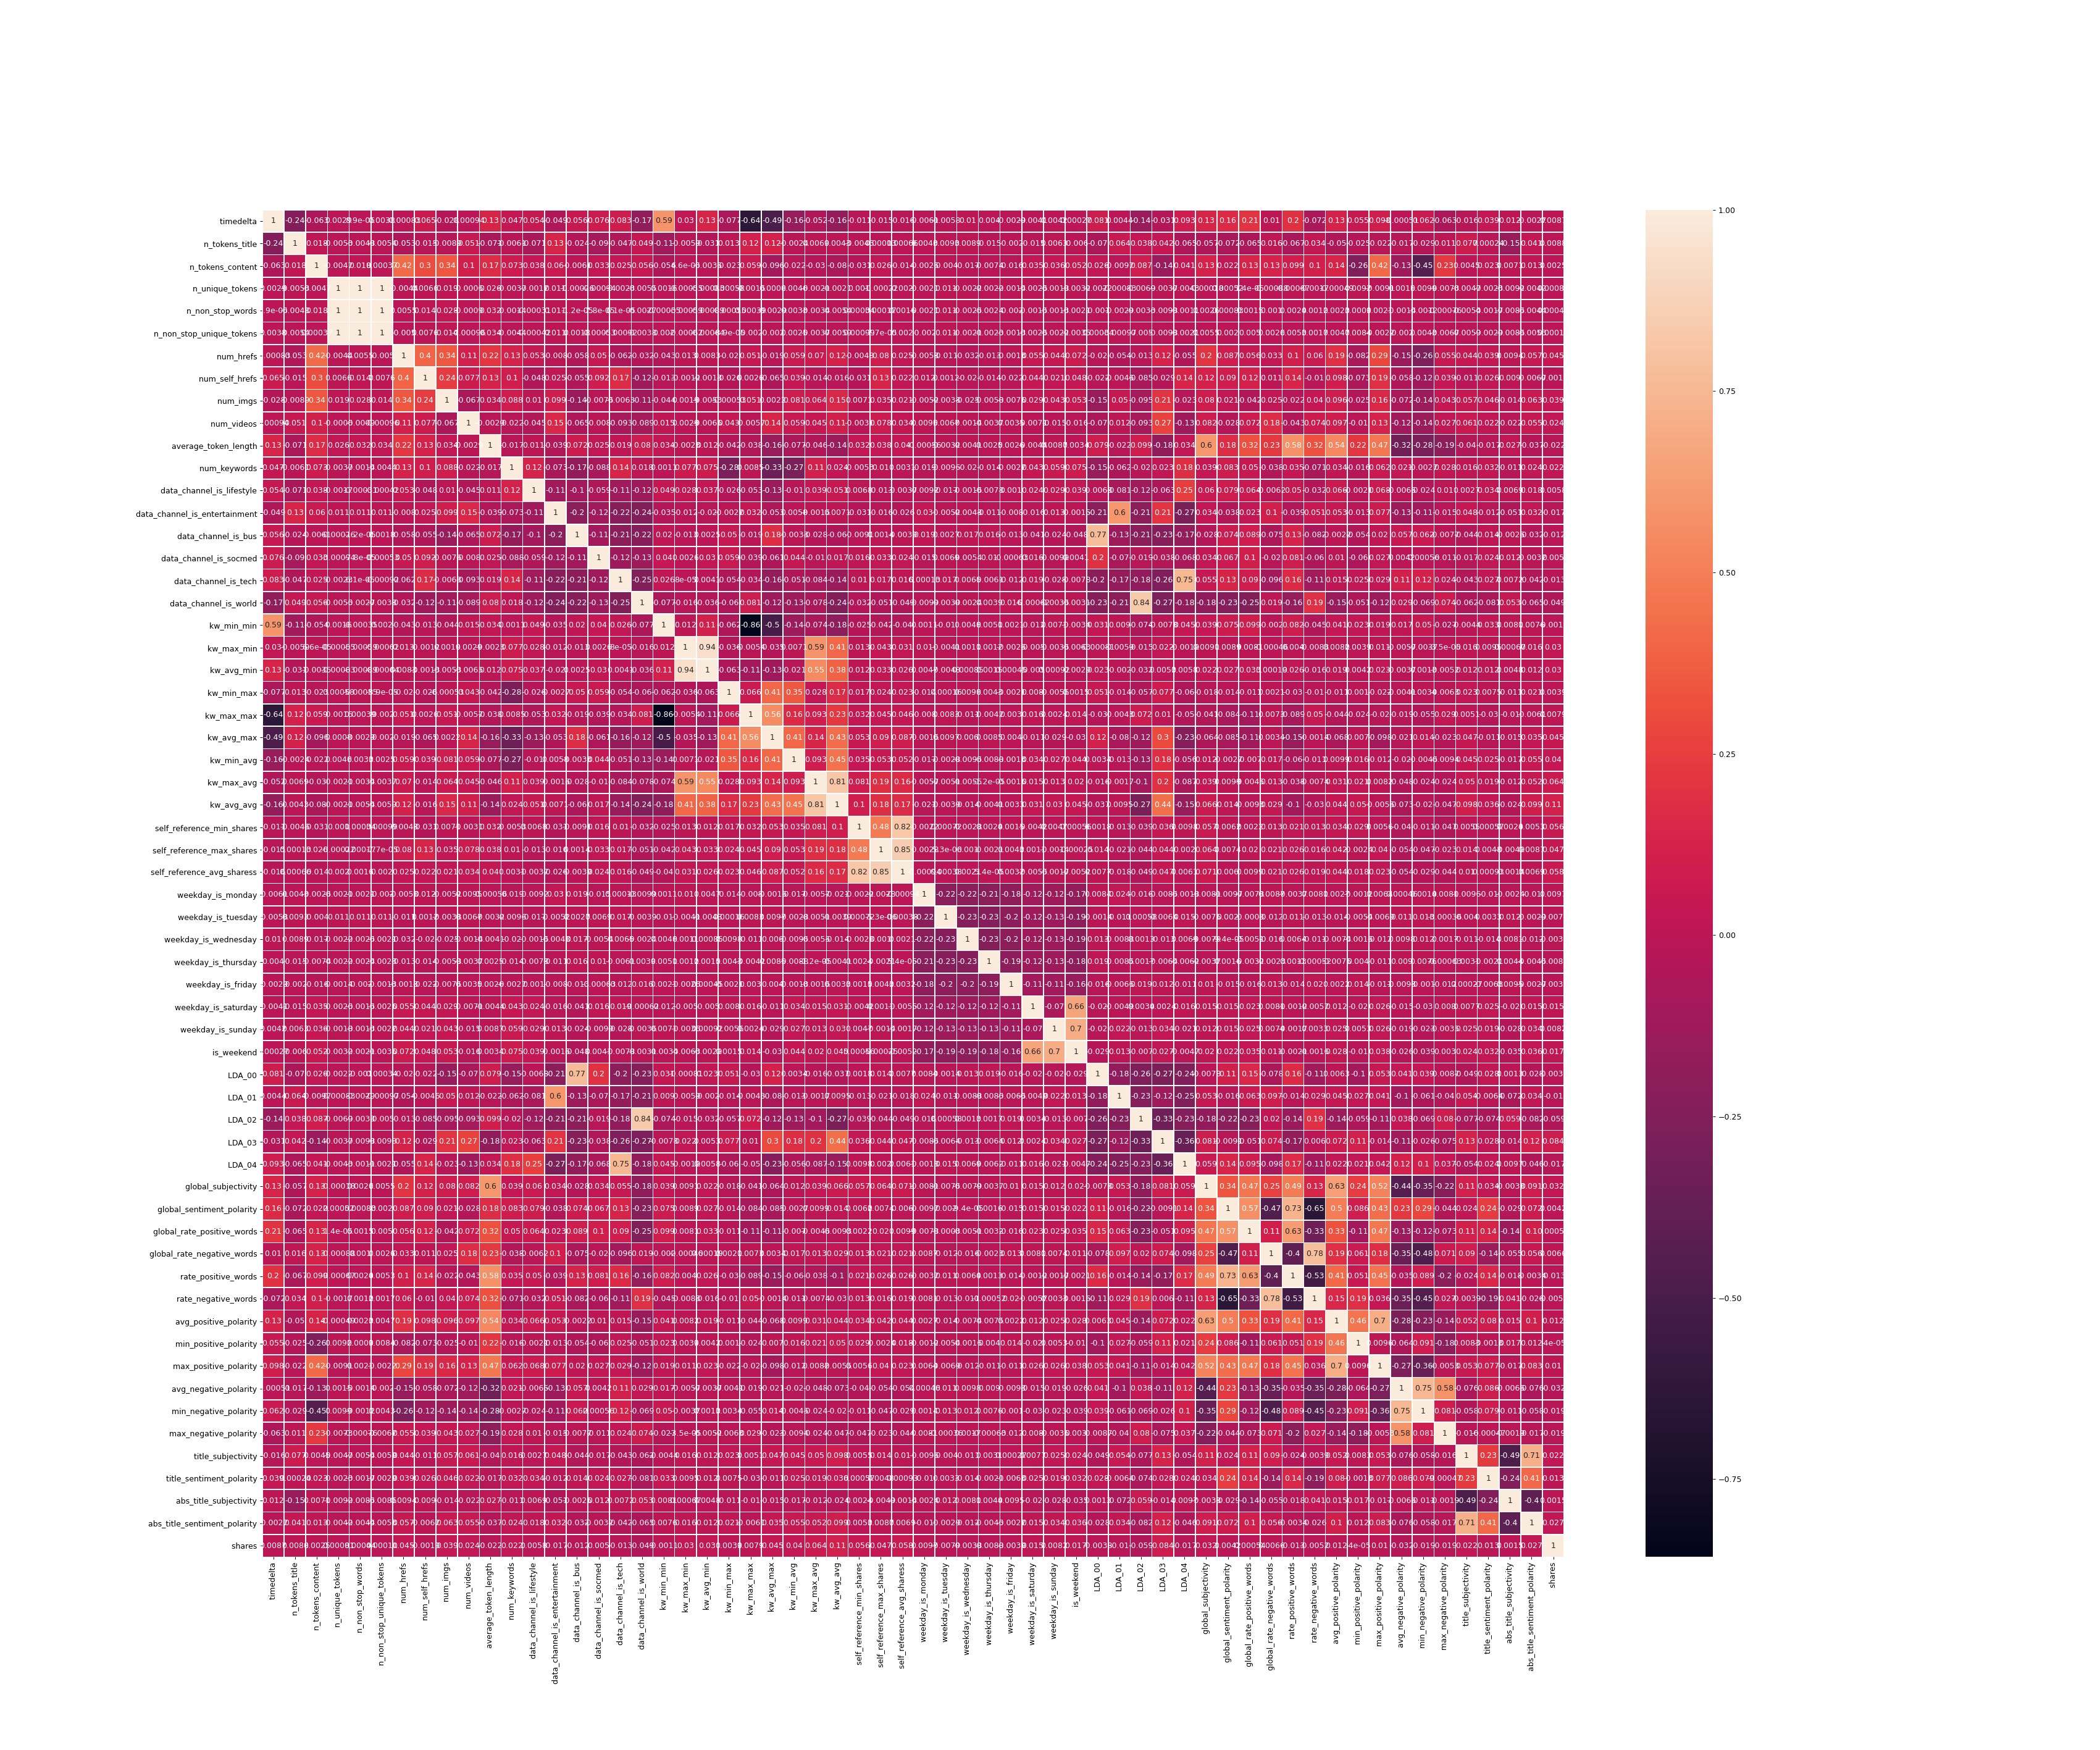

In [6]:
# Mirem la correlació entre els atributs d'entrada per entendre millor les dades
correlacio = dataset.corr()

plt.figure(figsize=(42, 35))

ax = sns.heatmap(correlacio, annot=True, linewidths=.5)

Com podem veure en la matriu de correlació, els atributs **n_unique_tokens** (percentatge de paraules úniques al contingut), **n_non_stop_words** (percentatge de paraules sense parar al contingut), **n_non_stop_unique_tokens** (percentatge de paraules úniques sense parar al contingut), **kw_max_min** (pitjor paraula clau (compartiments màxims)), **kw_avg_min** (pitjor paraula clau (comparticions mitjanes)) estan directment relcionats, fent que siguin linealment dependents. 

Y els atributs **kw_max_avg** (mitjana. paraula clau (màx. comparticions)), **kw_avg_avg** (mitjana. paraula clau (mitjana compartida)), **self_reference_min_shares** (mín. comparticions d'articles de referència a Mashable), **self_reference_max_shares** (màx. comparticions d'articles de referència a Mashable), **self_reference_avg_sharess** (mitjana. comparticions d'articles de referència a Mashable) com es pot intuir els **avg** es la mitjana dels altres atributs amb el nom similar.

Gracies a aixó, podem decidir eliminar un atribut per parella o les mitjanes per simplificar més la nostra base de dades i així evitar un posible *overfitting* a futur. 

In [210]:
dataset1=dataset.drop([' n_non_stop_words',' n_unique_tokens',' kw_avg_min',' kw_avg_avg',' self_reference_avg_sharess', 'url'],axis=1)
data = dataset1.values

x = data[:, :54]
y = data[:, 54]

print("Dimensionalitat de la BBDD:", dataset1.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

print("Per visualitzar les primeres 5 mostres de la BBDD:")
dataset1.head()

Dimensionalitat de la BBDD: (39644, 55)
Dimensionalitat de les entrades X (39644, 54)
Dimensionalitat de l'atribut Y (39644,)
Per visualitzar les primeres 5 mostres de la BBDD:


timedelta   n_tokens_title   n_tokens_content   n_non_stop_unique_tokens  \
0     731.000           12.000            219.000                      0.815   
1     731.000            9.000            255.000                      0.792   
2     731.000            9.000            211.000                      0.664   
3     731.000            9.000            531.000                      0.666   
4     731.000           13.000           1072.000                      0.541   

    num_hrefs   num_self_hrefs   num_imgs   num_videos   average_token_length  \
0       4.000            2.000      1.000        0.000                  4.680   
1       3.000            1.000      1.000        0.000                  4.914   
2       3.000            1.000      1.000        0.000                  4.393   
3       9.000            0.000      1.000        0.000                  4.405   
4      19.000           19.000     20.000        0.000                  4.683   

    num_keywords  ...   min_positive_polarity   max_positive_polarity  \
0          5.000  ...                   0.100                   0.700   
1          4.000  ...                   0.033                   0.700   
2          6.000  ...                   0.100                   1.000   
3          7.000  ...                   0.136                   0.800   
4          7.000  ...                   0.033                   1.000   

    avg_negative_polarity   min_negative_polarity   max_negative_polarity  \
0                  -0.350                  -0.600                  -0.200   
1                  -0.119                  -0.125                  -0.100   
2                  -0.467                  -0.800                  -0.133   
3                  -0.370                  -0.600                  -0.167   
4                  -0.220                  -0.500                  -0.050   

    title_subjectivity   title_sentiment_polarity   abs_title_subjectivity  \
0                0.500                     -0.188                    0.000   
1                0.000                      0.000                    0.500   
2                0.000                      0.000                    0.500   
3                0.000                      0.000                    0.500   
4                0.455                      0.136                    0.045   

    abs_title_sentiment_polarity   shares  
0                          0.188      593  
1                          0.000      711  
2                          0.000     1500  
3                          0.000     1200  
4                          0.136      505  

[5 rows x 55 columns]

In [186]:
print("Per veure estadístiques dels atributs numèrics de la BBDD:")
dataset1.describe()

Per veure estadístiques dels atributs numèrics de la BBDD:


timedelta   n_tokens_title   n_tokens_content  \
count   39644.000        39644.000          39644.000   
mean      354.530           10.399            546.515   
std       214.164            2.114            471.108   
min         8.000            2.000              0.000   
25%       164.000            9.000            246.000   
50%       339.000           10.000            409.000   
75%       542.000           12.000            716.000   
max       731.000           23.000           8474.000   

        n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  \
count                  39644.000   39644.000        39644.000  39644.000   
mean                       0.689      10.884            3.294      4.544   
std                        3.265      11.332            3.855      8.309   
min                        0.000       0.000            0.000      0.000   
25%                        0.626       4.000            1.000      1.000   
50%                        0.690       8.000            3.000      1.000   
75%                        0.755      14.000            4.000      4.000   
max                      650.000     304.000          116.000    128.000   

        num_videos   average_token_length   num_keywords  ...  \
count    39644.000              39644.000      39644.000  ...   
mean         1.250                  4.548          7.224  ...   
std          4.108                  0.844          1.909  ...   
min          0.000                  0.000          1.000  ...   
25%          0.000                  4.478          6.000  ...   
50%          0.000                  4.664          7.000  ...   
75%          1.000                  4.855          9.000  ...   
max         91.000                  8.042         10.000  ...   

        min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
count               39644.000               39644.000               39644.000   
mean                    0.095                   0.757                  -0.260   
std                     0.071                   0.248                   0.128   
min                     0.000                   0.000                  -1.000   
25%                     0.050                   0.600                  -0.328   
50%                     0.100                   0.800                  -0.253   
75%                     0.100                   1.000                  -0.187   
max                     1.000                   1.000                   0.000   

        min_negative_polarity   max_negative_polarity   title_subjectivity  \
count               39644.000               39644.000            39644.000   
mean                   -0.522                  -0.108                0.282   
std                     0.290                   0.095                0.324   
min                    -1.000                  -1.000                0.000   
25%                    -0.700                  -0.125                0.000   
50%                    -0.500                  -0.100                0.150   
75%                    -0.300                  -0.050                0.500   
max                     0.000                   0.000                1.000   

        title_sentiment_polarity   abs_title_subjectivity  \
count                  39644.000                39644.000   
mean                       0.071                    0.342   
std                        0.265                    0.189   
min                       -1.000                    0.000   
25%                        0.000                    0.167   
50%                        0.000                    0.500   
75%                        0.150                    0.500   
max                        1.000                    0.500   

        abs_title_sentiment_polarity     shares  
count                      39644.000  39644.000  
mean                           0.156   3395.380  
std                            0.226  11626.951  
min                            0.000    

<IPython.core.display.Javascript object>


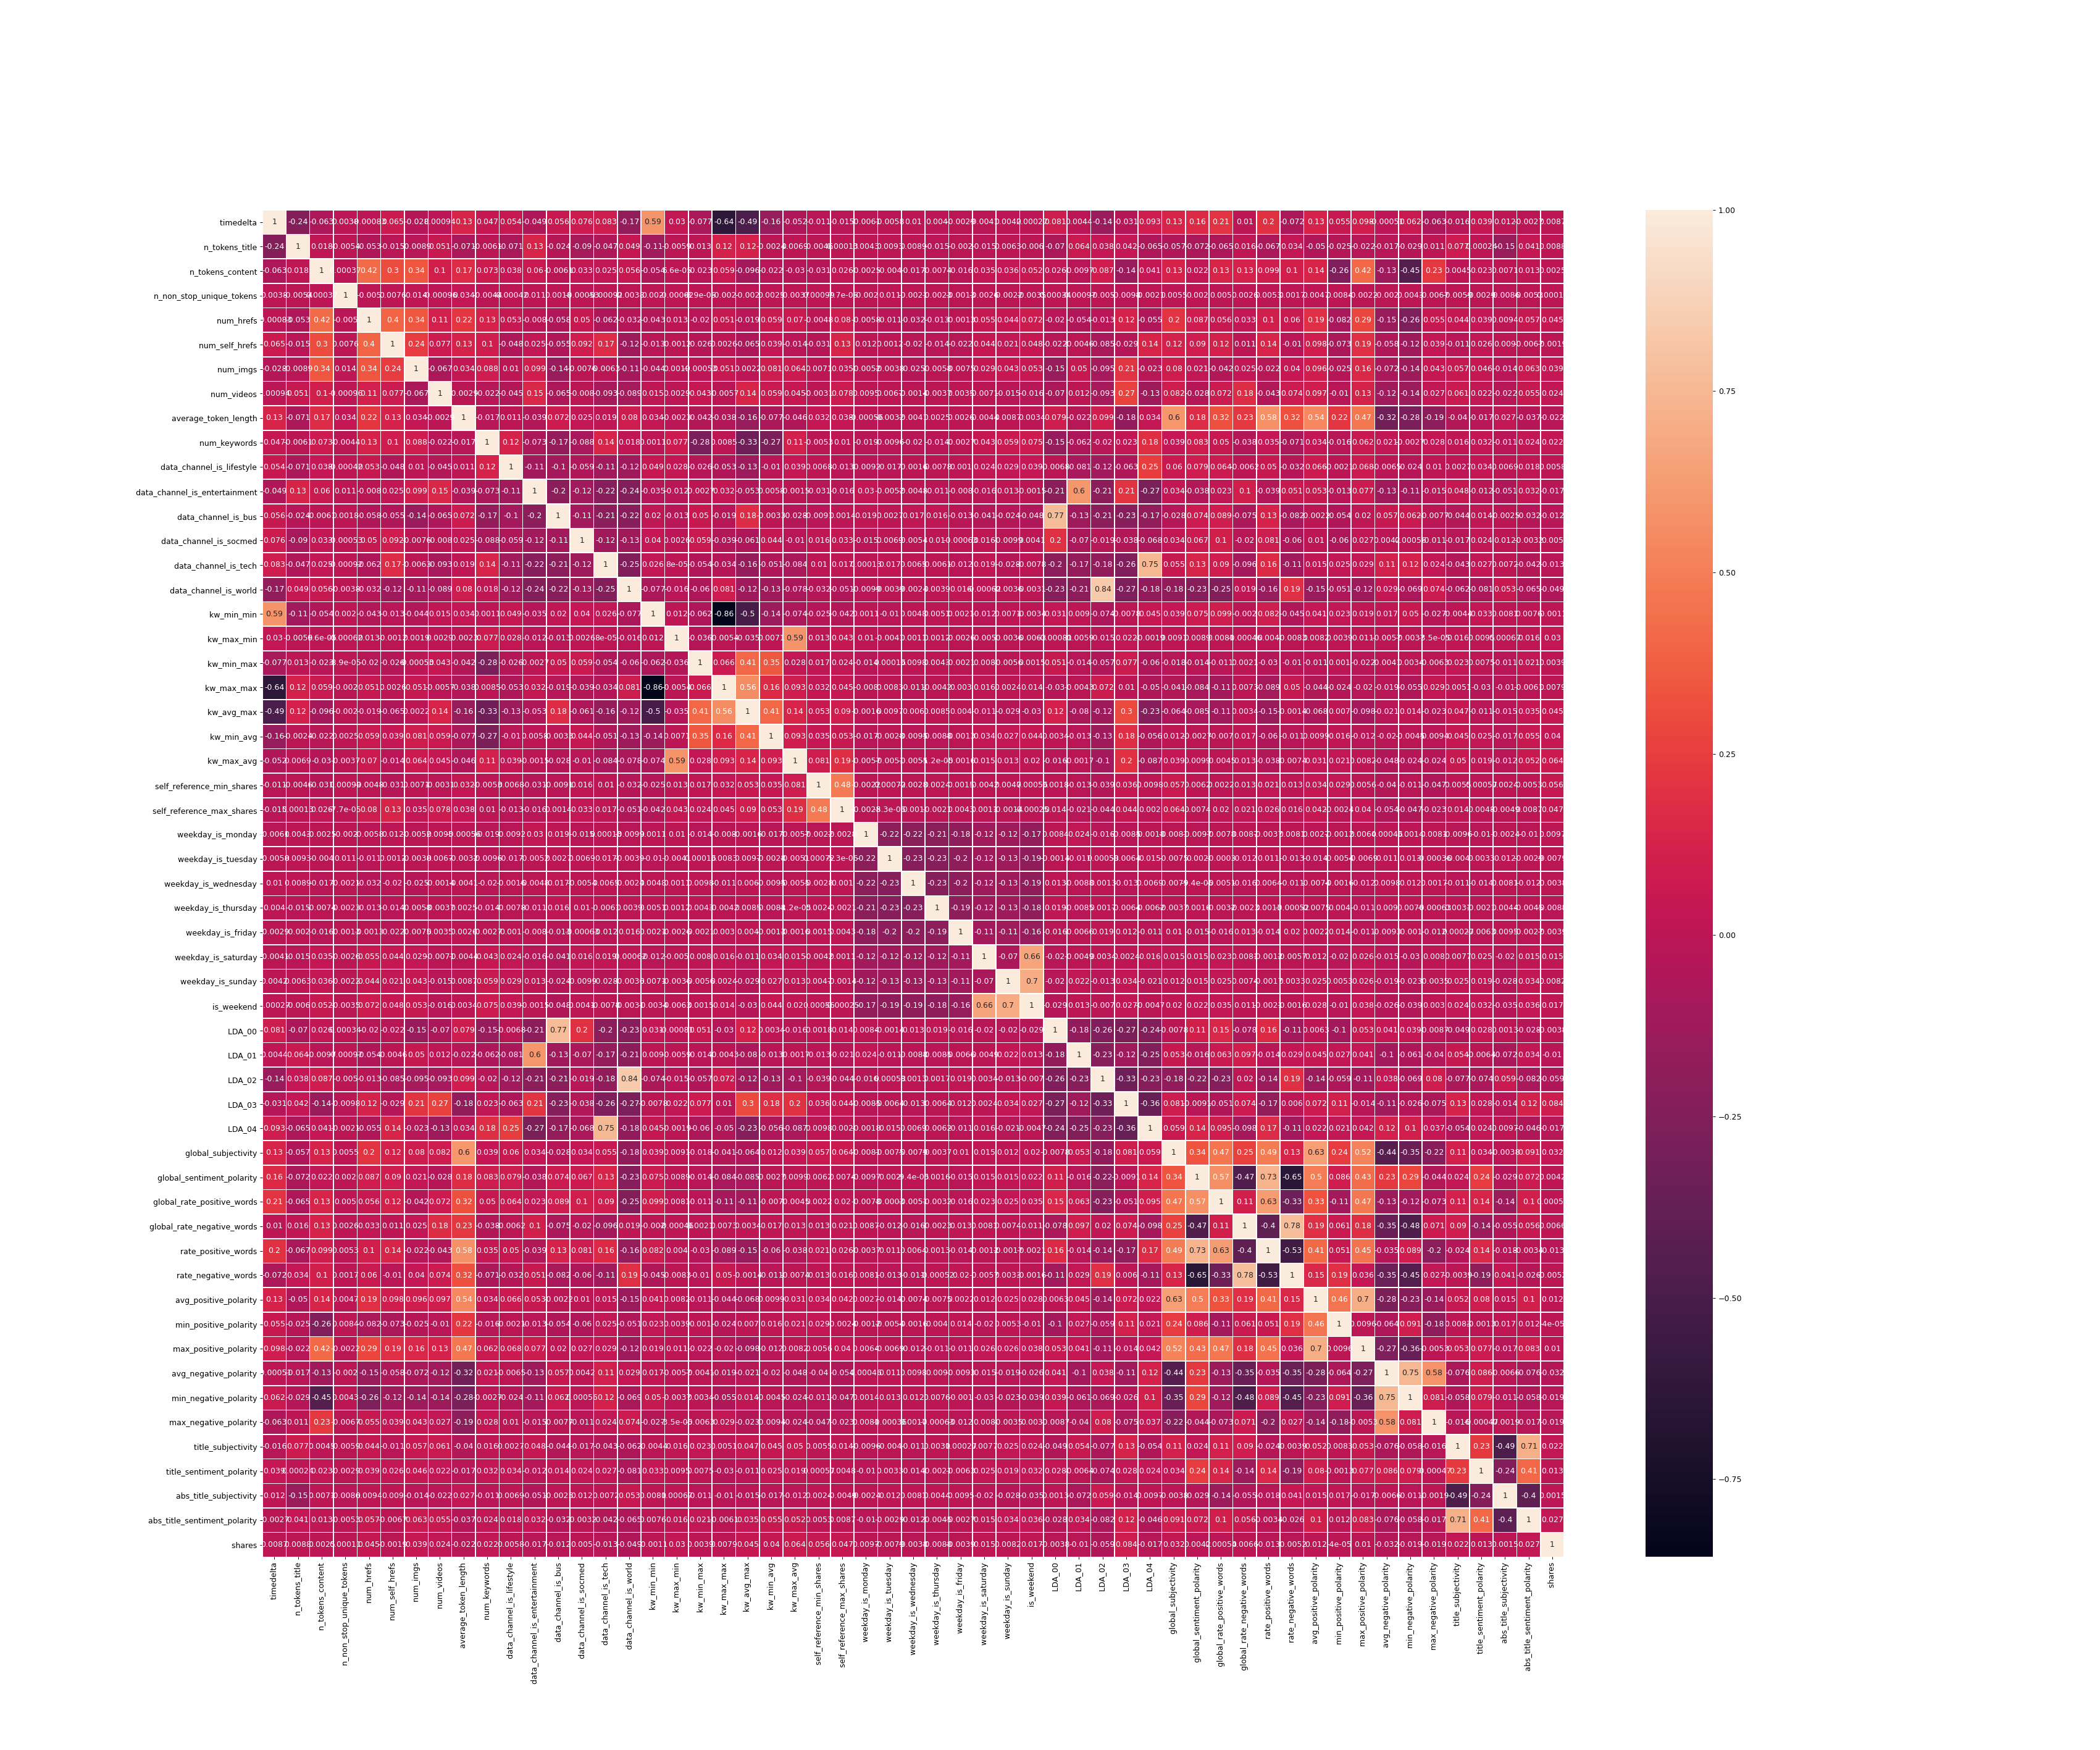

In [51]:
# Mirem la correlació entre els atributs d'entrada per entendre millor les dades
correlacio = dataset1.corr()

plt.figure(figsize=(42, 35))

ax = sns.heatmap(correlacio, annot=True, linewidths=.5)

Després de fer la neteja dels atributs, podem veure en el Heatmap que els atributs que tenen més correlació son:
    **LDA_00** (Proximitat amb el tema LDA 0)    - **data_channel_is_bus** (el canal de dades és 'Business'?)
    **LDA_02** (Proximitat amb el tema 2 de LDA) - **data_channel_is_world** (el canal de dades és "Món"?)
    **LDA_04** (Proximitat amb el tema 4 de LDA) - **data_channel_is_tech** (el canal de dades és "Tech"?)

A continuació els histogramas dels atributs anteriorment dits: 


<IPython.core.display.Javascript object>


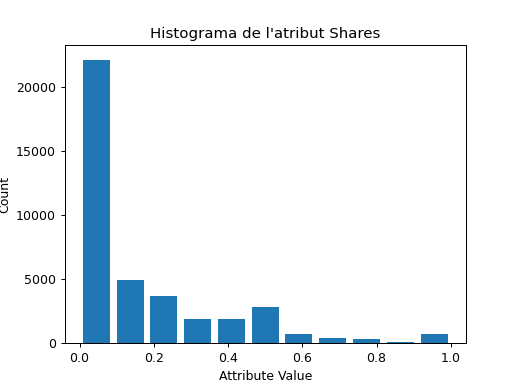

<IPython.core.display.Javascript object>


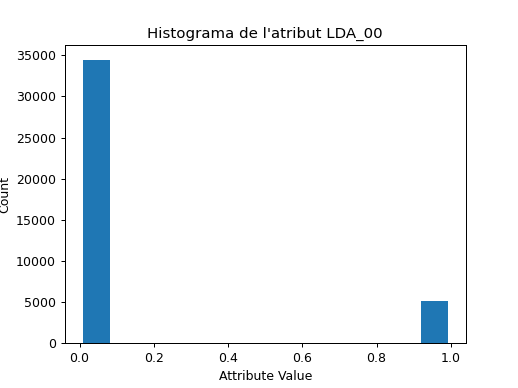

<IPython.core.display.Javascript object>


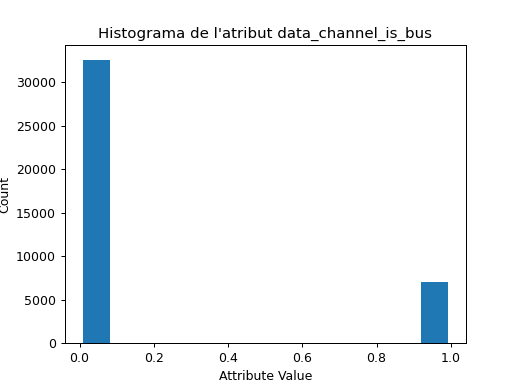

<IPython.core.display.Javascript object>


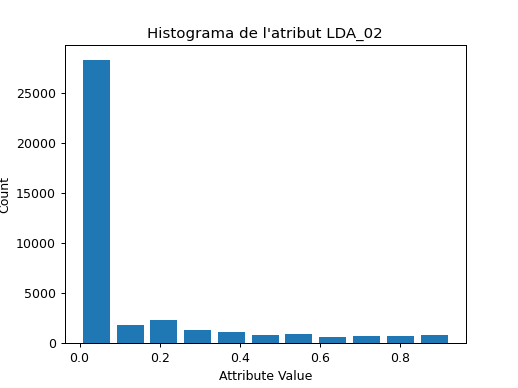

<IPython.core.display.Javascript object>


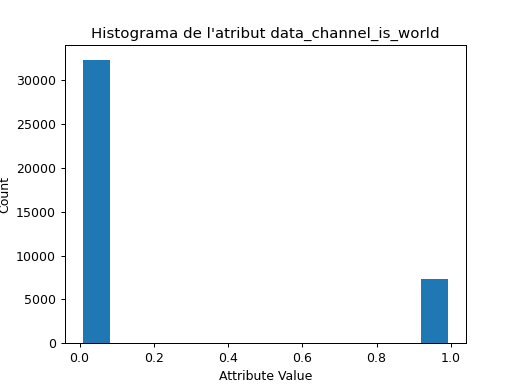

<IPython.core.display.Javascript object>


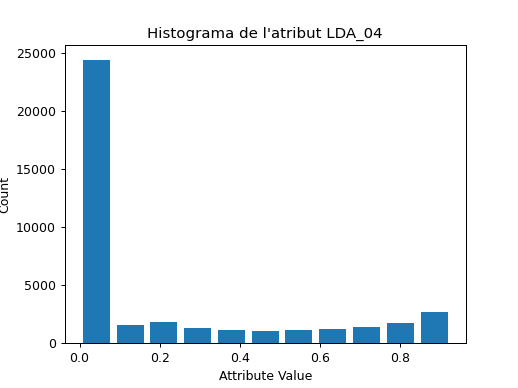

<IPython.core.display.Javascript object>


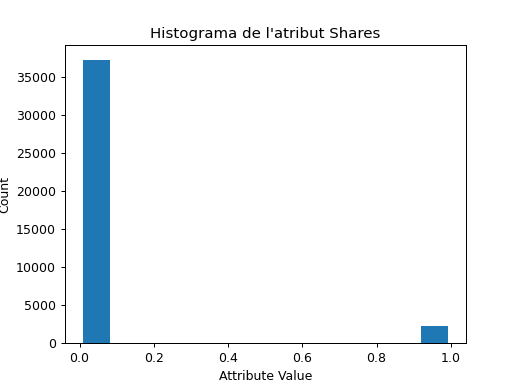

In [187]:
print("A continuació els histogramas dels atributs anteriorment dits: ")

plt.figure()
plt.title("Histograma de l'atribut Shares")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(x[:,53], bins=11, range=[np.min(x[:,53]), np.max(x[:,53])], histtype="bar", rwidth=0.8)

plt.figure()
plt.title("Histograma de l'atribut LDA_00")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(x[:,32], bins=11, range=[np.min(x[:,32]), np.max(x[:,32])], histtype="bar", rwidth=0.8)

plt.figure()
plt.title("Histograma de l'atribut data_channel_is_bus")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(x[:,11], bins=11, range=[np.min(x[:,11]), np.max(x[:,11])], histtype="bar", rwidth=0.8)

plt.figure()
plt.title("Histograma de l'atribut LDA_02")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(x[:,34], bins=11, range=[np.min(x[:,34]), np.max(x[:,34])], histtype="bar", rwidth=0.8)

plt.figure()
plt.title("Histograma de l'atribut data_channel_is_world")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(x[:,14], bins=11, range=[np.min(x[:,14]), np.max(x[:,14])], histtype="bar", rwidth=0.8)

plt.figure()
plt.title("Histograma de l'atribut LDA_04")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(x[:,36], bins=11, range=[np.min(x[:,36]), np.max(x[:,36])], histtype="bar", rwidth=0.8)

plt.figure()
plt.title("Histograma de l'atribut Shares")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(x[:,13], bins=11, range=[np.min(x[:,13]), np.max(x[:,13])], histtype="bar", rwidth=0.8)

In [188]:
# Mirem la relació entre atributs utilitzant la funció pairplot
'''relacio = sns.pairplot(dataset, corner=True)'''

'relacio = sns.pairplot(dataset, corner=True)'

## Model Learning

Gracies al procés del Data Mining que s'ha fet, podem veure i dir que els atributs en general no tenen molta correlació entre ells, i els que si ho están poden ser no molt importants, sumant aixó amb que en els atributs hi han moltes anomalies, podem dir que que el millor algoritme de predicció sería el **Random Forest**.
Pero esta clar que s'utilitzará altres per fer comparatives.

In [211]:
X = data[:, :54]
y = data[:, 54]

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=0)

In [212]:
import math

def mean_squeared_error(y1, y2):
    # comprovem que y1 i y2 tenen la mateixa mida
    assert(len(y1) == len(y2))
    mse = 0
    for i in range(len(y1)):
        mse += (y1[i] - y2[i])**2
    return mse / len(y1)

In [213]:
from sklearn.linear_model import LinearRegression

def regression(x, y):
    # Creem un objecte de regressió de sklearn
    regr = LinearRegression()

    # Entrenem el model per a predir y a partir de x
    regr.fit(x, y)

    # Retornem el model entrenat
    return regr

<IPython.core.display.Javascript object>


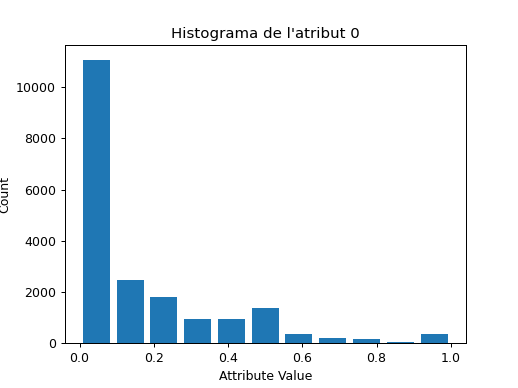

In [214]:
plt.figure()
plt.title("Histograma de l'atribut 0")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(x_train[:,53], bins=11, range=[np.min(x_train[:,53]), np.max(x_train[:,53])], histtype="bar", rwidth=0.8)

In [205]:
random_forest = RandomForestRegressor(min_samples_split=2)
random_forest.fit(x_train, y_train)

RandomForestRegressor()

In [206]:
predicted_test = rf.predict(x_test)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted_test)))

Mean Absolute Error: 3420.6200610432847
Mean Squared Error: 96703171.87981628
Root Mean Squared Error: 9833.777091220662


In [207]:
x_train.shape

(19822, 54)